# Phase-4


# Unsupervised ML (clustering)

**Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.**

**Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.**

**4.1 "Create 3 clusters as below.**

**Sensitive Area's**

**Moderate Area's**

**Peaceful Area's"**

**4.2 Create DataFrame for each cluster that shows data according to the areas.**

**4.3 "Analyse your clusters and prepare a report that explains all your observations.**

**Example -**

**What is impacting more crimes in sensitive areas. What needs to be done to reduce crime. Most safe and unsafe districts. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"**

**4.4 Capstone project overall story in your own words. Min 1000 words**

**Importing all of the required libraries for the project.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

**Loading District wise crimes committed classified by IPC from 2001 to 2012**

In [70]:
df_districtwise = pd.read_csv(r'C:\Users\hites\Downloads\India_Crime\India_Crime\01_District_wise_crimes_committed_IPC_2001_2012.csv')

In [71]:
df_districtwise 

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [72]:
df_districtwise['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI UT', 'LAKSHADWEEP', 'PUDUCHERRY'],
      dtype=object)

In [73]:
df_districtwise.replace({'STATE/UT': {'DELHI UT': 'DELHI'}}, inplace=True)

In [74]:
df_districtwise=df_districtwise[df_districtwise['DISTRICT']!='TOTAL']

In [75]:
# Dropping TOTAL IPC CRIMES column
df_districtwise.drop('TOTAL IPC CRIMES', axis = 1, inplace = True)

In [76]:
df_districtwise.shape

(8609, 32)

In [77]:
df_districtwise['TOTAL IPC CRIMES'] = df_districtwise.iloc[:, 3:].sum(axis = 1)

In [78]:
df_districtwise

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4449
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4567
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,6627
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3358
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
9011,DELHI,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,8443
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,67
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,876


**District wise crimes committed against SCs from 2001 to 2012**

In [9]:
df_districtwisesc=pd.read_csv(r'C:\Users\hites\Downloads\India_Crime\India_Crime\02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')

**Checking for the null values in the dataset.**

In [10]:
df_districtwisesc.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Rape                                    0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [11]:
df_districtwisesc.duplicated().sum()

2

In [12]:
# Droppin the duplicated rows
df_districtwisesc.drop_duplicates(keep = 'first', inplace = True)

In [13]:
# Renaming Year column to YEAR
df_districtwisesc.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [14]:
df_districtwisesc['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [15]:
df_districtwisesc=df_districtwisesc[df_districtwisesc['DISTRICT']!='TOTAL']

In [16]:
df_districtwisesc['TOTAL CRIMES AGAINST SC'] = df_districtwisesc.iloc[:, 3:].sum(axis=1)


In [17]:
df_districtwisesc1=df_districtwisesc[['STATE/UT','DISTRICT','YEAR','TOTAL CRIMES AGAINST SC']]

In [18]:
df_districtwisesc1

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST SC
0,ANDHRA PRADESH,ADILABAD,2001,55
1,ANDHRA PRADESH,ANANTAPUR,2001,127
2,ANDHRA PRADESH,CHITTOOR,2001,114
3,ANDHRA PRADESH,CUDDAPAH,2001,100
4,ANDHRA PRADESH,EAST GODAVARI,2001,89
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,2
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,1


**District wise crimes committed against STs from 2001 to 2012.**

In [19]:
df_districtwisest=pd.read_csv(r'C:\Users\hites\Downloads\India_Crime\India_Crime\02_District_wise_crimes_committed_against_ST_2001_2012.csv')

In [20]:
#Checking for the null values in the dataset.
df_districtwisest.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Rape                                    0
Kidnapping Abduction                    0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Protection of Civil Rights (PCR) Act    0
Prevention of atrocities (POA) Act      0
Other Crimes Against STs                0
dtype: int64

In [21]:
df_districtwisest.duplicated().sum()

2

In [22]:
# Droppin the duplicated rows
df_districtwisest.drop_duplicates(keep = 'first', inplace = True)

In [23]:
# Renaming Year column to YEAR
df_districtwisest.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [24]:
df_districtwisest['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [25]:
df_districtwisest=df_districtwisest[df_districtwisest['DISTRICT']!='TOTAL']

In [26]:
df_districtwisest['TOTAL CRIMES AGAINST ST']=df_districtwisest.iloc[:,3:].sum(axis=1)

In [27]:
df_districtwisest1=df_districtwisest[['STATE/UT','DISTRICT','YEAR','TOTAL CRIMES AGAINST ST']]

In [28]:
df_districtwisest1

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST ST
0,ANDHRA PRADESH,ADILABAD,2001,18
1,ANDHRA PRADESH,ANANTAPUR,2001,14
2,ANDHRA PRADESH,CHITTOOR,2001,2
3,ANDHRA PRADESH,CUDDAPAH,2001,4
4,ANDHRA PRADESH,EAST GODAVARI,2001,14
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,0
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0
9015,PUDUCHERRY,KARAIKAL,2012,0


**District wise crimes committed against children from 2001 to 2012**

In [29]:
df_districtwisechild=pd.read_csv(r'C:\Users\hites\Downloads\India_Crime\India_Crime\03_District_wise_crimes_committed_against_children_2001_2012.csv')

In [30]:
df_districtwisechild['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [31]:
df_districtwisechild.isnull().sum()

STATE/UT                              0
DISTRICT                              0
Year                                  0
Murder                               11
Rape                                 11
Kidnapping and Abduction             11
Foeticide                            11
Abetment of suicide                  11
Exposure and abandonment             11
Procuration of minor girls           11
Buying of girls for prostitution     11
Selling of girls for prostitution    11
Prohibition of child marriage act    11
Other Crimes                         11
Total                                 0
dtype: int64

In [32]:
# Imputing null values with 0
df_districtwisechild.fillna(0, inplace = True)

In [33]:
df_districtwisechild.duplicated().sum()

1

In [34]:
# Droppin the duplicated rows
df_districtwisechild.drop_duplicates(keep = 'first', inplace = True)

In [35]:
# Renaming Year column to YEAR
df_districtwisechild.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [36]:
df_districtwisechild=df_districtwisechild[df_districtwisechild['DISTRICT']!='TOTAL']

In [37]:
df_districtwisechild.rename(columns={"Total": "TOTAL CRIMES AGAINST CHILDREN"}, inplace=True)


In [38]:
df_districtwisechild.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Buying of girls for prostitution', 'Selling of girls for prostitution',
       'Prohibition of child marriage act', 'Other Crimes',
       'TOTAL CRIMES AGAINST CHILDREN'],
      dtype='object')

In [39]:
df_districtwisechild1=df_districtwisechild[['STATE/UT','DISTRICT','YEAR','TOTAL CRIMES AGAINST CHILDREN']]

In [40]:
df_districtwisechild1

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST CHILDREN
0,ANDHRA PRADESH,ADILABAD,2001,0
1,ANDHRA PRADESH,ANANTAPUR,2001,66
2,ANDHRA PRADESH,CHITTOOR,2001,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0
...,...,...,...,...
9007,DELHI,STF,2012,0
9008,DELHI,WEST,2012,542
9010,LAKSHADWEEP,LAKSHADWEEP,2012,0
9012,PUDUCHERRY,KARAIKAL,2012,7


**District wise crimes committed against women from 2001 to 2012**


In [41]:
df_districtwisewomen=pd.read_csv(r'C:\Users\hites\Downloads\India_Crime\India_Crime\42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [42]:
df_districtwisewomen['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [43]:
df_districtwisewomen.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

In [44]:
df_districtwisewomen.duplicated().sum()

0

In [45]:
# Renaming Year column to YEAR
df_districtwisewomen.rename(columns = {'Year': 'YEAR'}, inplace = True)

In [46]:
df_districtwisewomen=df_districtwisewomen[df_districtwisewomen['DISTRICT']!='TOTAL']

In [47]:
df_districtwisewomen['TOTAL CRIMES AGAINST WOMEN']=df_districtwisewomen.iloc[:,3:].sum(axis=1)

In [48]:
df_districtwisewomen1=df_districtwisewomen[['STATE/UT','DISTRICT','YEAR','TOTAL CRIMES AGAINST WOMEN']]

In [49]:
df_districtwisewomen1

,STATE/UT,DISTRICT,YEAR,TOTAL CRIMES AGAINST WOMEN
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
...,...,...,...,...
9010,DELHI,STF,2012,0
9011,DELHI,WEST,2012,739
9012,LAKSHADWEEP,LAKSHADWEEP,2012,2
9014,PUDUCHERRY,KARAIKAL,2012,11


# MERGING THE ABOVE DATASETS

In [79]:
total_crimes = (
    pd.merge(df_districtwise, df_districtwisesc1, how='inner', on=['STATE/UT', 'DISTRICT', 'YEAR'])
    .merge(df_districtwisest1, how='inner', on=['STATE/UT', 'DISTRICT', 'YEAR'])
    .merge(df_districtwisechild1, how='inner', on=['STATE/UT', 'DISTRICT', 'YEAR'])
    .merge(df_districtwisewomen1, how='inner', on=['STATE/UT', 'DISTRICT', 'YEAR'])
)


# GROUPING BY STATE/UT,DISTRICT AND SUMMING ALL THE CRIMES OVER THE YEARS!!

In [80]:
total_crimes=total_crimes.groupby(['STATE/UT','DISTRICT']).sum().reset_index().drop(['YEAR'],axis=1)

In [81]:
total_crimes

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,15,19,1,3,0,3,12,9,...,2,18,0,4,337,934,0,1,10,54
1,A & N ISLANDS,ANDAMAN,118,41,18,92,0,92,73,61,...,37,97,0,32,3638,8460,0,33,206,458
2,A & N ISLANDS,CAR,2,0,0,0,0,0,1,1,...,0,0,0,1,8,29,0,0,2,2
3,A & N ISLANDS,NICOBAR,12,2,2,2,0,2,1,0,...,0,1,0,0,117,261,0,3,1,11
4,A & N ISLANDS,NORTH,5,0,0,4,0,4,0,0,...,1,2,0,0,70,132,0,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,733,12,85,497,0,497,276,198,...,0,1778,0,206,7976,20257,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,188,58,21,19,0,19,67,36,...,2,10,0,4,549,7813,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,42,3,6,2,0,2,31,23,...,1,1,0,0,413,2947,0,1,7,61
822,WEST BENGAL,SILIGURI_PC,32,6,6,21,0,21,123,111,...,12,370,0,69,385,4016,0,8,44,552


# PHASE 4--CLUSTERING


# 4.1 CLUSTERING USING THE KMEANS!!

In [82]:
# Initializing a KMeans clustering model with 3 clusters
kmeans_clusters = KMeans(n_clusters = 3, random_state = 0)


In [83]:
from sklearn.cluster import KMeans

In [84]:
# Fit the KMeans model to the data and assign clusters to each data point
clusters = kmeans_clusters.fit_predict(total_crimes.iloc[:, 2:])

# 4.2 Create DataFrame for each cluster that shows data according to the areas.

# REGION 1) Peaceful Area's!!

In [85]:
peaceful_regions = total_crimes[clusters == 0]

In [86]:
peaceful_regions

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
0,A & N ISLANDS,A and N ISLANDS,15,19,1,3,0,3,12,9,...,2,18,0,4,337,934,0,1,10,54
1,A & N ISLANDS,ANDAMAN,118,41,18,92,0,92,73,61,...,37,97,0,32,3638,8460,0,33,206,458
2,A & N ISLANDS,CAR,2,0,0,0,0,0,1,1,...,0,0,0,1,8,29,0,0,2,2
3,A & N ISLANDS,NICOBAR,12,2,2,2,0,2,1,0,...,0,1,0,0,117,261,0,3,1,11
4,A & N ISLANDS,NORTH,5,0,0,4,0,4,0,0,...,1,2,0,0,70,132,0,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,WEST BENGAL,PURULIA,733,12,85,497,0,497,276,198,...,0,1778,0,206,7976,20257,8,9,8,3180
820,WEST BENGAL,SEALDAH G.R.P.,188,58,21,19,0,19,67,36,...,2,10,0,4,549,7813,0,0,2,134
821,WEST BENGAL,SILIGURI G.R.P.,42,3,6,2,0,2,31,23,...,1,1,0,0,413,2947,0,1,7,61
822,WEST BENGAL,SILIGURI_PC,32,6,6,21,0,21,123,111,...,12,370,0,69,385,4016,0,8,44,552


# REGION 2) MODERATE Area's!!

In [87]:
moderate_regions = total_crimes[clusters == 1]

In [88]:
moderate_regions

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
6,ANDHRA PRADESH,ADILABAD,1186,869,151,672,0,672,754,570,...,1242,4126,0,3593,20579,67349,686,269,269,8583
7,ANDHRA PRADESH,ANANTAPUR,1922,1248,51,266,0,266,839,554,...,622,1645,0,5058,15861,67111,1569,371,402,5287
8,ANDHRA PRADESH,CHITTOOR,1270,739,32,368,0,368,907,531,...,2179,3283,0,8168,24575,87823,1393,14,345,8004
9,ANDHRA PRADESH,CUDDAPAH,1196,506,38,298,0,298,653,522,...,538,1790,0,4815,21993,63628,1537,128,574,5002
11,ANDHRA PRADESH,EAST GODAVARI,1041,1211,45,499,0,499,780,378,...,1584,4927,0,6655,18113,108005,2042,223,213,9514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,WEST BENGAL,JALPAIGURI,1345,798,504,1777,0,1777,1853,1536,...,5,6745,0,2884,24018,81038,6,6,364,12073
813,WEST BENGAL,MALDA,885,1189,313,1331,0,1331,1323,949,...,19,4221,0,799,14434,42035,6,15,237,7811
815,WEST BENGAL,MURSHIDABAD,1644,2657,480,3352,0,3352,2943,2519,...,33,17229,0,3198,17323,99817,13,13,923,27004
816,WEST BENGAL,NADIA,1355,1869,318,1734,0,1734,2532,2363,...,32,11296,72,2351,23783,95102,0,1,94,17582


# REGION 3) SENSITIVE Area's!!

In [89]:
sensitive_regions = total_crimes[clusters == 2]

In [90]:
sensitive_regions

,STATE/UT,DISTRICT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,TOTAL CRIMES AGAINST SC,TOTAL CRIMES AGAINST ST,TOTAL CRIMES AGAINST CHILDREN,TOTAL CRIMES AGAINST WOMEN
10,ANDHRA PRADESH,CYBERABAD,1810,914,96,641,0,641,1398,857,...,3168,8932,4,10314,23701,173447,1657,341,296,15411
15,ANDHRA PRADESH,HYDERABAD CITY,1455,1563,65,712,0,712,1466,690,...,1741,14055,2,5966,28465,261276,1293,76,872,19685
121,BIHAR,PATNA,4586,2845,301,572,0,572,3502,1169,...,14,2838,39,4618,70387,175558,1503,33,893,5931
191,GUJARAT,AHMEDABAD COMMR.,1204,778,101,506,0,506,2301,1669,...,225,11670,0,2084,100241,278467,798,41,1435,14973
327,KARNATAKA,BANGALORE COMMR.,2831,4067,54,642,1,641,3014,947,...,407,3832,0,1182,124176,459437,1423,16,675,9010
395,MADHYA PRADESH,BHOPAL,821,1099,31,1272,0,1272,610,496,...,623,1967,3,3299,102247,196550,1565,226,1326,7087
409,MADHYA PRADESH,INDORE,1339,1810,40,1255,0,1255,625,460,...,860,3918,5,4657,105984,247160,1139,421,4401,10392
459,MAHARASHTRA,MUMBAI,1254,712,33,776,0,776,793,393,...,305,1195,0,3487,31636,198320,67,2,1021,4251
460,MAHARASHTRA,MUMBAI COMMR.,1542,1063,33,1386,0,1386,1334,904,...,971,2736,1,4942,47568,310755,186,11,2865,9304
472,MAHARASHTRA,PUNE COMMR.,1317,1123,57,846,0,846,1087,774,...,1052,2493,1,5687,30547,190804,193,3,3391,6283


# 4.3.3 "Analyse your clusters and prepare a report that explains all your observations

**10 MOST SAFE AREAS!!**

In [94]:
peaceful_regions = peaceful_regions.sort_values(by = 'TOTAL IPC CRIMES', ascending = True)

In [97]:
peaceful_regions[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']].head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,TOTAL IPC CRIMES
0,DELHI,S.T.F.,0
1,JAMMU & KASHMIR,RAILWAYS KATRA,4
2,MANIPUR,CID,9
3,TRIPURA,G.R.P.,9
4,JAMMU & KASHMIR,RAILWAYS KMR,10
5,HIMACHAL PRADESH,CID,15
6,ASSAM,BIEO,16
7,A & N ISLANDS,CAR,29
8,TRIPURA,GRP,29
9,JAMMU & KASHMIR,RAILWAYS JAMMU,35


The safest districts from 2001 to 2012 in India were S.T.F., Railways Katra, G.R.P., CID, Railways KMR, BIEO, CAR, GRP, Railways Jammu.

**Moderate Regions**

In [98]:
moderate_regions = moderate_regions.sort_values(by = 'TOTAL IPC CRIMES', ascending = False)

In [99]:
moderate_regions[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']].head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,TOTAL IPC CRIMES
0,UTTAR PRADESH,LUCKNOW,150796
1,WEST BENGAL,24 PARGANAS NORTH,149975
2,WEST BENGAL,24 PARGANAS SOUTH,143768
3,DELHI,SOUTH,136324
4,MAHARASHTRA,NAGPUR COMMR.,133110
5,MADHYA PRADESH,JABALPUR,132563
6,MADHYA PRADESH,GWALIOR,131577
7,MAHARASHTRA,THANE COMMR.,130500
8,RAJASTHAN,ALWAR,121539
9,RAJASTHAN,JAIPUR,118473


The Moderate districts from 2001 to 2012 in India were LUCIKNOW., 24 PARGANAS NORTH and SOUTH , SOUTH DELHI ,NAGPUR COMMR,JABALPURGWALIOR,THANE COMMR,ALWAR and JAIPUR.

**Top 10 Sensitive Regions**

In [100]:
sensitive_regions = sensitive_regions.sort_values(by = 'TOTAL IPC CRIMES', ascending = False)

In [101]:
sensitive_regions[['STATE/UT', 'DISTRICT', 'TOTAL IPC CRIMES']].head(10).reset_index().drop(['index'],axis=1)

,STATE/UT,DISTRICT,TOTAL IPC CRIMES
0,KARNATAKA,BANGALORE COMMR.,459437
1,MAHARASHTRA,MUMBAI COMMR.,310755
2,GUJARAT,AHMEDABAD COMMR.,278467
3,ANDHRA PRADESH,HYDERABAD CITY,261276
4,MADHYA PRADESH,INDORE,247160
5,WEST BENGAL,KOLKATA,201713
6,MAHARASHTRA,MUMBAI,198320
7,MADHYA PRADESH,BHOPAL,196550
8,TAMIL NADU,CHENNAI,195004
9,MAHARASHTRA,PUNE COMMR.,190804


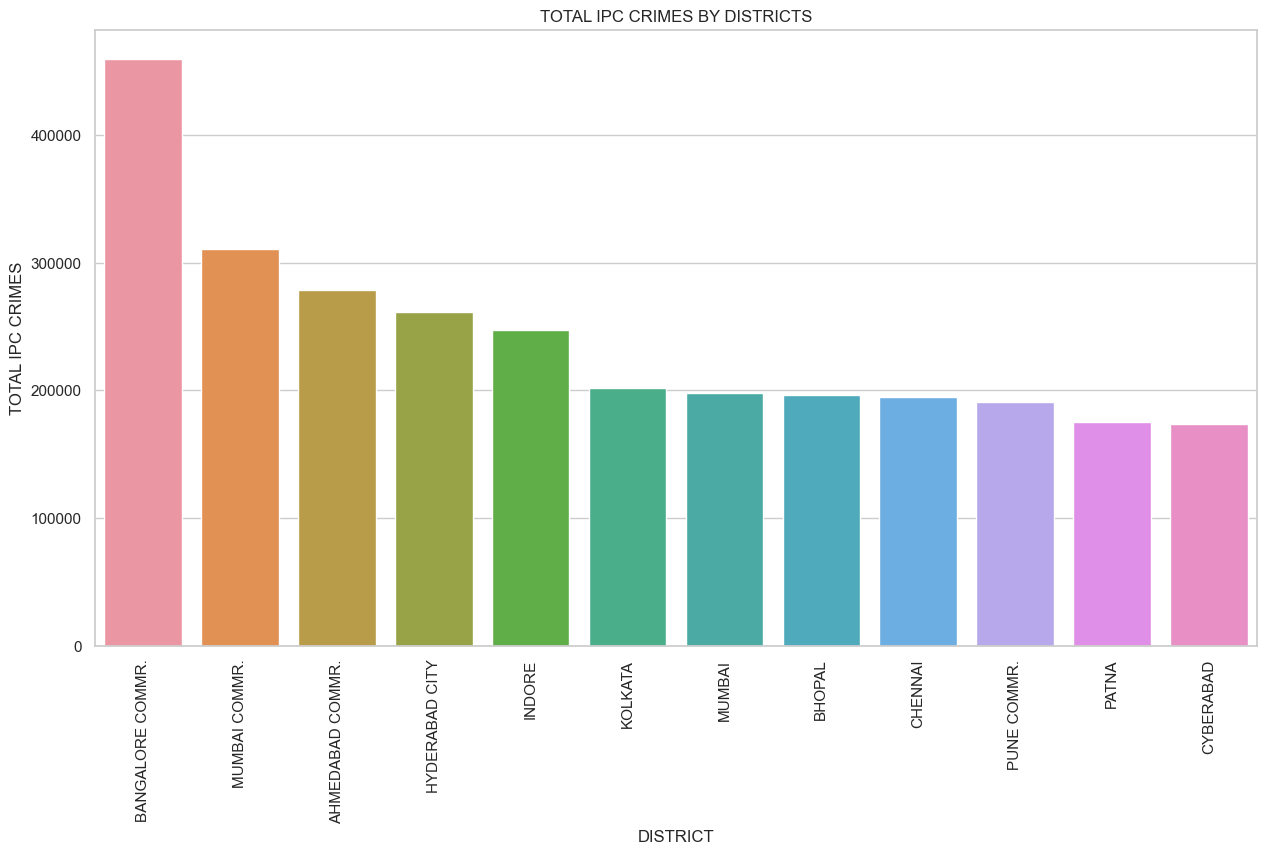

In [103]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 8))

# Creating the bar plot
sns.barplot(x='DISTRICT', y='TOTAL IPC CRIMES', data=sensitive_regions)

# Adding title and rotating x-axis labels for better readability
plt.title('TOTAL IPC CRIMES BY DISTRICTS')
plt.xticks(rotation=90)  # Adjust rotation angle as needed

# Show the plot
plt.show()

The unsafest districts from 2001 to 2012 in India were Bangalore Commissionerate, Mumbai Commissionerate, Ahmedabad Commissionerate, Hyderabad City, Indore, Kolkata, Mumbai, Bhopal, Chennai, and Pune Commissionerate.

**Observations:**
    
The bar graph shows Bangalore Commissionerate has the highest total IPC crimes, followed by Mumbai Commissionerate and Ahmedabad Commissionerate. Patna and Cyberabad have relatively lower total IPC crimes compared to the other districts.

**Factors Impacting more crimes in sensitive areas:**

**Population Density:**

Higher in urban areas, contributing to increased crime.

Poverty and Economic Inequality:

High levels of poverty and economic inequality can contribute to increased crime rates. Lack of economic opportunities may lead individuals to resort to criminal activities.
Unemployment:

High unemployment rates can create frustration and desperation, potentially pushing individuals towards criminal behavior as a means of survival.
Education Levels:

Low levels of education may be associated with higher crime rates. Lack of access to quality education can limit employment opportunities and contribute to criminal behavior.
Lack of Social Services:

Insufficient access to social services such as healthcare, mental health support, and addiction treatment can contribute to criminal activity, especially in cases involving substance abuse.

Housing Issues:

Overcrowded and substandard housing conditions may contribute to stress and tension, potentially leading to higher crime rates.
Gang Activity:

Presence of gangs and organized crime can significantly impact crime rates in an area. Gang-related activities often involve violence and contribute to an overall sense of insecurity.
Drug Abuse and Trafficking:

Areas with a high prevalence of drug abuse and drug trafficking may experience increased crime rates, including property crimes and violence associated with the drug trade.
Police-Community Relations:

Poor relationships between law enforcement and the community can lead to underreporting of crimes and reduced cooperation in crime prevention efforts.
Limited Community Resources:

Lack of community resources and support, such as youth programs, community centers, and recreational facilities, may leave residents with few positive alternatives.
Political Instability:

Political instability and weak governance can contribute to lawlessness and higher crime rates, particularly in areas where the rule of law is not effectively enforced.
Historical Factors:

Historical factors, such as a legacy of discrimination, inequality, or social unrest, can have lasting effects on crime rates in certain areas.
Lack of Employment Opportunities:

Limited job opportunities can contribute to frustration and desperation, potentially leading individuals to engage in criminal activities.
Proximity to High-Crime Areas:

Proximity to neighborhoods with high crime rates can lead to the spillover effect, where crime from one area impacts neighboring communities.



# What needs to be done to reduce crime.

**Reducing crime is a complex task that involves addressing various social, economic, and systemic factors. Here are several strategies and considerations that can contribute to crime reduction:**

**Community Policing:**
Foster positive relationships between law enforcement and the community. Encourage community involvement in crime prevention efforts.

**Education and Employment Opportunities:**
Improve access to education and vocational training to enhance job prospects. Reduce poverty and unemployment, addressing root causes of crime.

**Mental Health Services:**
Increase access to mental health resources and support. Addressing mental health issues can reduce the likelihood of certain crimes.

**Youth Engagement Programs:**
Provide constructive activities and programs for young people. Engage youth in positive community initiatives to prevent delinquency.

**Drug and Substance Abuse Prevention:**
Implement and support programs to prevent substance abuse. Treatment and rehabilitation for individuals struggling with addiction.

**Community Empowerment:**
Empower communities to address local issues and implement solutions. Encourage residents to take pride in their neighborhoods.

**Improved Lighting and Infrastructure:**
Enhance public spaces with better lighting and well-maintained infrastructure. Create environments that discourage criminal activities.

**Restorative Justice Programs:**
Implement restorative justice initiatives that focus on rehabilitation and reconciliation. Encourage accountability and understanding between offenders and victims.

**Technology and Surveillance:**
Use technology for crime analysis and predictive policing. Implement effective surveillance systems in public spaces.

**Social Support Services:**
Strengthen social services to support vulnerable populations. Provide resources for at-risk individuals and families.

**Legal Reforms:**
Evaluate and reform laws to ensure fairness and effectiveness. Address systemic issues that contribute to crime.

**Early Intervention Programs:**
Identify and address risk factors in individuals at an early age. Provide support and resources to prevent criminal behavior.

**Data-Driven Approaches:**
Utilize data to identify crime trends and allocate resources effectively. Implement evidence-based policies and interventions.

# 4.4   Capstone project overall story in your own words. Min 1000 words.

India is a diverse country with a population of over 1.40 billion people, and crime is a significant issue that affects its citizens. From 2001 to 2012, India witnessed a diverse and complex landscape of crime.According to the data available from the National Crime Records Bureau (NCRB) for the year 2012, there were a total of 2.38 million reported IPC cases of crime in India in 2012, a 2.6 % increase from the previous year. Here's an overall story based on the analysis of Crimes in India:

**Widespread Criminal Incidents:**
    
Crime, in its various forms, permeated the entire nation during the period of 2001-2012. Notably, high instances of murder, rape, and kidnapping were reported across diverse states and Union Territories.

**Concerns for Women and Children:**

A poignant aspect of the crime narrative was the significant concerns related to crimes against women, such as rape and dowry deaths, as well as incidents involving crimes against children. These alarming figures underscored the vulnerability of these demographics.

**Societal Challenges Reflected:**

Deep-rooted societal challenges found expression in the data, visible through crimes like dowry deaths, offenses against Scheduled Castes (SCs) and Scheduled Tribes (STs), and the prevalence of riots.

**Urban Challenges:** 

Urban areas, exemplified by Delhi, bore a substantial burden of crime. This highlighted the challenges associated with densely populated metropolitan regions and underscored the need for urban-focused crime prevention strategies.

**Socio-Economic Disparities:**

A noteworthy correlation emerged between states with higher literacy rates, better socio-economic development, and lower crime rates. This emphasized the link between education, economic prosperity, and crime prevention.

**Law Enforcement Challenges:**

The pervasive incidence of crimes pointed to persistent challenges faced by law enforcement agencies in maintaining public safety and effectively combating a diverse range of criminal activities.

**Complex Regional Dynamics:**

Different states exhibited diverse crime patterns, reflecting the intricate interplay of regional dynamics, cultural factors, and socio-economic conditions.

**Total IPC Crimes:**

The cumulative total of IPC crimes across the country during this period was substantial, indicating the imperative for comprehensive strategies to address and prevent criminal activities.

**Criminal Justice System Pressures:**

The sheer volume of reported crimes suggested significant pressures on the criminal justice system, encompassing the police, judiciary, and correctional facilities.

**Opportunities for Improvement:**

The rich tapestry of crime data provides valuable insights for policymakers, law enforcement, and communities. It serves as a foundation for identifying areas of improvement, implementing targeted interventions, and fostering collaborative efforts to enhance public safety.

During the period from 2001 to 2012, certain states and Union Territories (UTs) in India demonstrated distinctive patterns in crime rates. States such as Andhra Pradesh, Bihar, Delhi, Madhya Pradesh, Maharashtra, and Uttar Pradesh experienced notably high crime rates across various categories, including murder, rape, and kidnapping. These regions faced complex challenges, reflecting both urban and socio-economic dynamics.

In contrast, states like Arunachal Pradesh, Goa, and Sikkim reported comparatively lower crime rates, signaling a relatively more secure environment. These states showcased a trend of better law and order, potentially influenced by factors such as lower population density, cultural dynamics, and effective law enforcement. The variations in crime rates underscore the diverse socio-economic and regional factors influencing the overall safety and security landscape across different states and UTs in India during this period.

Crimes against women—such as rape, sexual harassment, and domestic abuse—remain a serious concern. Of the 3,09,546 recorded cases of crimes against women in 2012, 11.3% had a sexual assault or rape component.Also Dowry deaths, were particularly notable in states with higher crime rates, including Andhra Pradesh and Bihar. Crimes against women, encompassing a range of offenses, were prevalent in these high-crime regions, with Uttar Pradesh and Madhya Pradesh reporting significant figures.In India, crimes against women continue to be a persistent issue despite the implementation of tougher legislation and greater public awareness.

Crimes against children including rape, kidnapping and abduction ,murder,traffacking,importation of girl are still the leading concerns in India. In 2012, there were 35,049 reported cases of crimes against children, and 21.51% of these cases were related to rape or sexual assault, and record 46.24% of the csaes are recorded of the murder only among differnt crimes against children.Even after various laws and stricter law enforcements being made to control the crimes against children a increase by 254.86% can be seen from the year 2001 to 2012.Madhya Pradesh records the most cases counting to 45,345 over the years and is followed by Uttar Pradesh Delhi and Maharastra counting the numbers to 36,001,33014,31301.


Moreover, significant cases of crimes against Scheduled Castes (SCs) and Scheduled Tribes (STs) were reported.In the year 2012 33,655 cases were recorded against SC and 5922 against sc. The vulnerability of these marginalized communities was evident in the reported figures, with higher counts in states like Uttar Pradesh and Madhya Pradesh. The data indicated a concerning intersectionality between crime rates and caste dynamics, emphasizing the need for targeted interventions and social reforms.

Involvement of juveniles poses a serious threat to society, as they can easily be led astray. Stricter laws are needed to address this issue. The number of recorded cases has increased over the years, with Madhya Pradesh having the highest and Manipur the lowest.

Police violations contribute significantly to overall crime rates. The year 2009 saw the highest number of recorded cases. Chattisgarh reported the most cases of human rights violations from 2001 to 2010.

Law enforcement officers and other public servants are targets of attacks from a variety of angles. From 2001 to 2010, Uttar Pradesh registered a large number of incidents.


States with persistently high crime rates in a number of categories, like Madhya Pradesh, Uttar Pradesh, and Bihar, are in need of focused intervention plans, changes to the legal system, and social development programs.


Overall, while there has been a increase in the number of reported crimes in India hinting that there are still significant challenges to be addressed. The government needs to continue its efforts to improve law enforcement, raise public awareness, and address socio-economic factors that contribute to crime.

# THANK YOU